In [382]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# Загрузка данных
data_lkoh = pd.read_csv('data/Прошлые данные - LKOH.csv')
# data_ingr = pd.read_csv('data/Прошлые данные - INGR.csv')
# data_lent = pd.read_csv('data/Прошлые данные - LENT.csv')
# data_lsrg = pd.read_csv('data/Прошлые данные - LSRG.csv')
# data_mvid = pd.read_csv('data/Прошлые данные - MVID.csv')
# data_nvtk = pd.read_csv('data/Прошлые данные - NVTK.csv')
# data_ozondr = pd.read_csv('data/Прошлые данные - OZONDR.csv')
# data_pikk = pd.read_csv('data/Прошлые данные - PIKK.csv')
# data_rosn = pd.read_csv('data/Прошлые данные - ROSN.csv')
# data_fivedr = pd.read_csv('data/Прошлые данные - FIVEDR.csv')
# data_smlt = pd.read_csv('data/Прошлые данные - SMLT.csv')
# data_gazp = pd.read_csv('data/Прошлые данные - GAZP (3).csv')
data_lkoh

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %
0,13.10.2023,"7.244,0","7.143,0","7.250,0","7.136,0","1,68M","1,74%"
1,12.10.2023,"7.120,0","6.862,5","7.154,0","6.848,0","2,72M","3,33%"
2,11.10.2023,"6.890,5","6.864,5","7.099,5","6.835,5","3,47M","0,54%"
3,10.10.2023,"6.853,5","6.874,0","6.880,0","6.822,5","552,20K","-0,15%"
4,09.10.2023,"6.863,5","6.880,0","6.895,5","6.822,0","1,11M","0,98%"
...,...,...,...,...,...,...,...
2689,18.01.2013,"2.017,0","2.016,0","2.022,0","2.012,4","655,19K","0,21%"
2690,17.01.2013,"2.012,7","2.013,3","2.020,0","1.996,0","942,60K","0,25%"
2691,16.01.2013,"2.007,6","2.006,5","2.011,0","1.990,5","708,56K","0,08%"
2692,15.01.2013,"2.006,0","2.018,3","2.018,6","2.000,2","559,97K","-0,69%"


In [383]:
# Убираем суффиксы "K" из столбца "Объём"
data_lkoh['Объём'] = data_lkoh['Объём'].str.replace('M', '000000').str.replace('K', '000')

data_lkoh['Изм. %'] = data_lkoh['Изм. %'].str.replace('%', '')

# Преобразование типов данных с учетом разделителей тысяч и возможных десятичных запятых
data_lkoh['Дата'] = pd.to_datetime(data_lkoh['Дата'])
data_lkoh['Цена'] = pd.to_numeric(data_lkoh['Цена'].str.replace('.', '').str.replace(',', '.'))
data_lkoh['Откр.'] = pd.to_numeric(data_lkoh['Откр.'].str.replace('.', '').str.replace(',', '.'))
data_lkoh['Макс.'] = pd.to_numeric(data_lkoh['Макс.'].str.replace('.', '').str.replace(',', '.'))
data_lkoh['Мин.'] = pd.to_numeric(data_lkoh['Мин.'].str.replace('.', '').str.replace(',', '.'))
data_lkoh['Объём'] = pd.to_numeric(data_lkoh['Объём'].str.replace('.', '').str.replace(',', ''))
data_lkoh['Изм. %'] = pd.to_numeric(data_lkoh['Изм. %'].str.replace(',', '.'))

C:\Users\User\AppData\Local\Temp\ipykernel_18696\4092150197.py:7: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_lkoh['Дата'] = pd.to_datetime(data_lkoh['Дата'])


In [385]:
data_lkoh.dtypes

Дата      datetime64[ns]
Цена             float64
Откр.            float64
Макс.            float64
Мин.             float64
Объём              int64
Изм. %           float64
dtype: object

In [388]:
import pandas as pd

df = data_lkoh
df['dayofweek'] = df['Дата'].dt.dayofweek
df['quarter'] = df['Дата'].dt.quarter
df['month'] = df['Дата'].dt.month
df['year'] = df['Дата'].dt.year
df['dayofyear'] = df['Дата'].dt.dayofyear
df['dayofmonth'] = df['Дата'].dt.day
df['weekofyear'] = df['Дата'].dt.isocalendar().week


data_lkoh

,Дата,Цена,Откр.,Макс.,Мин.,Объём,Изм. %,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2023-10-13,7244.0,7143.0,7250.0,7136.0,168000000,1.74,4,4,10,2023,286,13,41
1,2023-10-12,7120.0,6862.5,7154.0,6848.0,272000000,3.33,3,4,10,2023,285,12,41
2,2023-10-11,6890.5,6864.5,7099.5,6835.5,347000000,0.54,2,4,10,2023,284,11,41
3,2023-10-10,6853.5,6874.0,6880.0,6822.5,55220000,-0.15,1,4,10,2023,283,10,41
4,2023-10-09,6863.5,6880.0,6895.5,6822.0,111000000,0.98,0,4,10,2023,282,9,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689,2013-01-18,2017.0,2016.0,2022.0,2012.4,65519000,0.21,4,1,1,2013,18,18,3
2690,2013-01-17,2012.7,2013.3,2020.0,1996.0,94260000,0.25,3,1,1,2013,17,17,3
2691,2013-01-16,2007.6,2006.5,2011.0,1990.5,70856000,0.08,2,1,1,2013,16,16,3
2692,2013-01-15,2006.0,2018.3,2018.6,2000.2,55997000,-0.69,1,1,1,2013,15,15,3


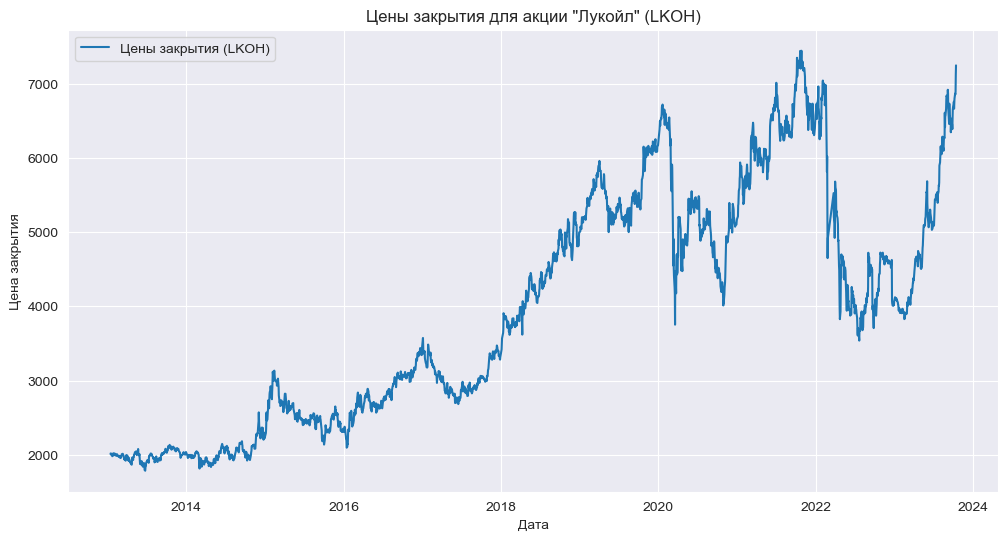

In [369]:
import matplotlib.pyplot as plt

# Построение графика цен закрытия для акции "Лукойл" (LKOH)
plt.figure(figsize=(12, 6))
plt.plot(data_lkoh['Дата'], data_lkoh['Цена'], label='Цены закрытия (LKOH)')
plt.title('Цены закрытия для акции "Лукойл" (LKOH)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()


In [370]:
# Функция для расчета скользящих средних
def calculate_moving_averages(data, window):
    data['SMA_' + str(window)] = data['Цена'].rolling(window=window).mean()  # Простое скользящее среднее
    data['EMA_' + str(window)] = data['Цена'].ewm(span=window, adjust=False).mean()  # Экспоненциальное скользящее среднее
    return data

# Функция для расчета RSI
def calculate_rsi(data, window=14):
    delta = data['Цена'].diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    data['RSI'] = rsi
    return data

# Функция для расчета MACD
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data['Цена'].ewm(span=short_window, adjust=False).mean()
    long_ema = data['Цена'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = short_ema - long_ema
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

# Расчет признаков
data_lkoh = calculate_moving_averages(data_lkoh, window=20)  # Пример: 20-дневные скользящие средние
data_lkoh = calculate_rsi(data_lkoh)
data_lkoh = calculate_macd(data_lkoh)

In [371]:
import pandas as pd

# Interpolate missing values for 'RSI' and 'SMA_20' columns
data_lkoh['RSI'].interpolate(inplace=True)
data_lkoh['SMA_20'].interpolate(inplace=True)

# Check for remaining missing values
missing_values = data_lkoh.isnull().sum()
missing_values

Дата            0
Цена            0
Откр.           0
Макс.           0
Мин.            0
Объём           0
Изм. %          0
SMA_20         19
EMA_20          0
RSI            13
MACD            0
Signal_Line     0
dtype: int64

In [392]:
# Выберите начальную дату (например, первая дата в вашем наборе данных)
start_date = data_lkoh['Дата'].min()

# Рассчитайте количество дней от начальной даты для каждой строки
data_lkoh['timestamp'] = (data_lkoh['Дата'] - start_date).dt.days

In [321]:
train_size = int(len(data_lkoh) * 0.2)
data_lkoh = data_lkoh.dropna()


In [420]:
data_lkoh.dtypes

Дата          datetime64[ns]
Цена                 float64
Откр.                float64
Макс.                float64
Мин.                 float64
Объём                  int64
Изм. %               float64
dayofweek              int32
quarter                int32
month                  int32
year                   int32
dayofyear              int32
dayofmonth             int32
weekofyear            UInt32
timestamp              int64
dtype: object

In [0]:
from tensorflow.python.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler


from sklearn.preprocessing import MinMaxScaler
# Scale the input data
scaler = MinMaxScaler(feature_range=(0,1))
data = data_lkoh[['Цена']]
data['Цена'] = scaler.fit_transform(data['Цена'].values.reshape(-1, 1))


# Create sliding window of data points
def create_dataset(dataset, time_steps=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), :]
        dataX.append(a)
        dataY.append(dataset[i + time_steps, -1])  # Assuming 'Цена' is the last column
    return np.array(dataX), np.array(dataY)

time_steps = 10
X, y = create_dataset(data.values, time_steps)

# Split into train and test sets
X_train_LTSM, X_test_LTSM = X[:train_size], X[train_size:]
y_train_LTSM, y_test_LTSM = y[:train_size], y[train_size:]

# Create and train the LSTM model

model = Sequential()
# 1st lstm layer
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train_LTSM.shape[1], 1)))
model.add(Dropout(0.2))
# 2st lstm layer
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
# 3st lstm layer
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
# 4st lstm layer 
model.add(LSTM(units=100,return_sequences= False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mae')
# train the model
history = model.fit(X_train_LTSM, y_train_LTSM, epochs=10, batch_size=64, validation_data=(X_test_LTSM, y_test_LTSM))




# Train the model

# Plot the validation loss
plt.plot(history.history['val_loss'][5:])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [491]:
len(X_test_LTSM)

882

In [ ]:

# Make predictions using the trained model
predictions_LTSM_test = model.predict(X_test_LTSM)
predictions_LTSM_train = model.predict(X_train_LTSM)


In [478]:


# Inverse transform the predictions
# predictions_LTSM_test = scaler.inverse_transform(predictions_LTSM_test)
# predictions_LTSM_train = scaler.inverse_transform(predictions_LTSM_train)
# Calculate metrics
mse = mean_squared_error(y_test_LTSM, predictions_LTSM_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_LTSM, predictions_LTSM_test)

print('RMSE (Root Mean Squared Error):', rmse)
print('R2 (Coefficient of Determination):', r2)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Вычисляем MAPE
mape = calculate_mape(y_test_LTSM, predictions_LTSM_test)
print('MAPE (Mean Absolute Percentage Error):', mape)


RMSE (Root Mean Squared Error): 0.015688179403473158
R2 (Coefficient of Determination): 0.9218881240582985
MAPE (Mean Absolute Percentage Error): inf


C:\Users\User\AppData\Local\Temp\ipykernel_18696\1812559520.py:12: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [507]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Подготовка данных для XGBoost
X = data_lkoh[[ 'dayofweek', 'quarter', 'month', 'year',
         'dayofyear', 'dayofmonth', 'weekofyear','timestamp']]
y = data_lkoh['Цена']  # Целевая переменная
print(train_size)
train_size = int(len(data_lkoh) * 0.2)

# Разделение данных на обучающую и тестовую выборки
X_test,X_train = X[:train_size], X[train_size:]
y_test,y_train = y[:train_size], y[train_size:]
print(len(X_train))
print(len(X_test))

# Убедитесь, что X_test и X_test_lstm имеют одинаковое количество строк
X_test = X_test[:len(X_test_LTSM)]

# Убедитесь, что y_test и y_test_lstm имеют одинаковое количество строк
y_test = y_test[:len(y_test_LTSM)]

# Убедитесь, что X_test и X_test_lstm имеют одинаковое количество строк
X_train = X_train[:len(X_train_LTSM)]

# Убедитесь, что y_test и y_test_lstm имеют одинаковое количество строк
y_train = y_train[:len(y_train_LTSM)]

# Создание и обучение модели XGBoost
model_xgb = xgb.XGBRegressor(max_depth=30, n_estimators=500)  # Подберите параметры по необходимости
model_xgb.fit(X_train, y_train)

# Прогнозирование
xgb_predictions_test = model_xgb.predict(X_test)
xgb_predictions_train = model_xgb.predict(X_train)

# Рассчет метрик
mse = mean_squared_error(y_test, xgb_predictions_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgb_predictions_test)

print('RMSE (Root Mean Squared Error):', rmse)
print('r2 (Root Mean Squared Error):', r2)

2155
2156
538
RMSE (Root Mean Squared Error): 1556.125811215221
r2 (Root Mean Squared Error): -0.7705463179536531


In [508]:
X_train

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,timestamp
538,2,3,8,2021,216,4,31,3124
539,1,3,8,2021,215,3,31,3123
540,0,3,8,2021,214,2,31,3122
541,4,3,7,2021,211,30,30,3119
542,3,3,7,2021,210,29,30,3118
...,...,...,...,...,...,...,...,...
2334,4,2,6,2014,171,20,25,522
2335,3,2,6,2014,170,19,25,521
2336,2,2,6,2014,169,18,25,520
2337,1,2,6,2014,168,17,25,519


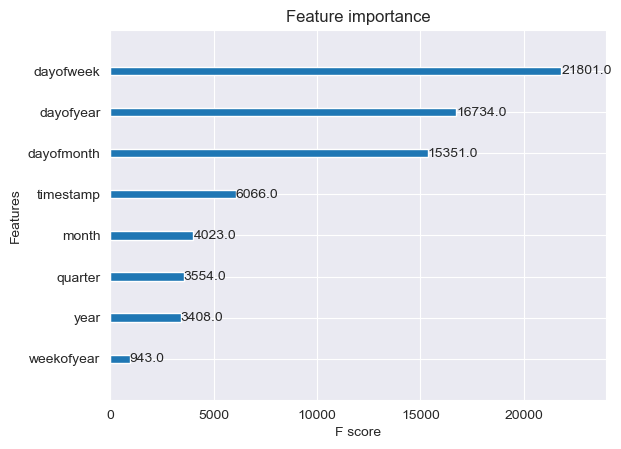

In [509]:
# Plot feature importance
xgb.plot_importance(model_xgb)
plt.show()

In [510]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare data for Random Forest
X = data_lkoh[[ 'dayofweek', 'quarter', 'month', 'year',
                'dayofyear', 'dayofmonth', 'weekofyear','timestamp']]
y = data_lkoh['Цена']  # Target variable

# Split data into training and test sets
X_train, X_test = X[train_size:], X[:train_size]
y_train, y_test = y[train_size:], y[:train_size]

# Make sure X_test and X_test_lstm have the same number of rows
X_test = X_test[:len(X_test_LTSM)]

# Make sure y_test and y_test_lstm have the same number of rows
y_test = y_test[:len(y_test_LTSM)]

# Make sure X_train and X_train_lstm have the same number of rows
X_train = X_train[:len(X_train_LTSM)]

# Make sure y_train and y_train_lstm have the same number of rows
y_train = y_train[:len(y_train_LTSM)]

# Create and train the Random Forest model
model_rf = RandomForestRegressor(max_depth=30, n_estimators=200)  # Adjust the parameters as needed
model_rf.fit(X_train, y_train)

# Predict
rf_predictions_test = model_rf.predict(X_test)
rf_predictions_train = model_rf.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_test, rf_predictions_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions_test)

print('RMSE (Root Mean Squared Error):', rmse)
print('r2 (Root Mean Squared Error):', r2)

RMSE (Root Mean Squared Error): 1583.203812489114
r2 (Root Mean Squared Error): -0.8327006498214478


In [514]:
print(xgb_predictions_train.shape)
print(predictions_LTSM_train.shape)
print(rf_predictions_train.shape)

print(xgb_predictions_test.shape)
print(predictions_LTSM_test.shape)
print(rf_predictions_test.shape)


(1801,)
(1801, 1)
(1801,)
(538,)
(882, 1)
(538,)


In [513]:
ensemble_features_train = np.column_stack((xgb_predictions_train, predictions_LTSM_train,rf_predictions_train))

ensemble_features_test = np.column_stack((xgb_predictions_test, np.squeeze(predictions_LTSM_test), rf_predictions_test))


xgboost_ensemble_model = xgb.XGBRegressor(max_depth=40, n_estimators=500)  # Подберите параметры по необходимости
xgboost_ensemble_model.fit(ensemble_features_train, y_train)


xgboost_ensemble_model_pred = xgboost_ensemble_model.predict(ensemble_features_test)

# Рассчет метрик
mse = mean_squared_error(y_test, xgboost_ensemble_model_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, xgboost_ensemble_model_pred)

print('RMSE (Root Mean Squared Error):', rmse)
print('r2 (Root Mean Squared Error):', r2)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 538 and the array at index 1 has size 882

In [ ]:
from sklearn.ensemble import BaggingRegressor

# Усреднение прогнозов
averaged_predictions = np.mean(ensemble_features_test, axis=1)

# Веса для взвешенного усреднения
weights = [0.5, 0.3, 0.2,]  # Пример весов (сумма весов должна быть равна 1)

# Взвешенное усреднение прогнозов
weighted_average_predictions = np.dot(ensemble_features_test, weights)

In [ ]:

# Обучение BaggingRegressor
bagging_model = BaggingRegressor(base_estimator=xgboost_ensemble_model, n_estimators=10)
bagging_model.fit(ensemble_features_train, y_train)
bagging_predictions = bagging_model.predict(ensemble_features_test)

In [ ]:

# Обучение RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=30, n_estimators=200)
random_forest_model.fit(ensemble_features_train, y_train)
random_forest_predictions = random_forest_model.predict(ensemble_features_test)

In [ ]:
    

# Рассчет R^2 для каждого усреднения
r2_averaged = r2_score(y_test, averaged_predictions)
r2_weighted_avg = r2_score(y_test, weighted_average_predictions)
r2_bagging = r2_score(y_test, bagging_predictions)
r2_random_forest = r2_score(y_test, random_forest_predictions)


# Создание графика
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Фактическая цена')

# Добавление предсказанных цен для каждого усреднения
plt.plot(averaged_predictions, label=f'Усреднение (R^2={r2_averaged:.2f})')
plt.plot(weighted_average_predictions, label=f'Взвешенное усреднение (R^2={r2_weighted_avg:.2f})')
plt.plot(bagging_predictions, label=f'Bagging (R^2={r2_bagging:.2f})')
plt.plot(random_forest_predictions, label=f'Random Forest (R^2={r2_random_forest:.2f})')


plt.xlabel('Индекс')
plt.ylabel('Цена')
plt.legend()
plt.title('Сравнение фактической и предсказанной цен')
plt.show()


In [ ]:
r2_random_forest

In [ ]:
# Plot feature importance
xgb.plot_importance(xgboost_ensemble_model)
plt.show()

In [ ]:
import numpy as np
xgboost_ensemble_model_pred = random_forest_predictions
# Initialize variables
max_profit = 0
total_profit = 0
trades = []

# Определение сигналов на покупку, продажу и удержание
signals = np.zeros_like(xgboost_ensemble_model_pred)
signals[xgboost_ensemble_model_pred > y_test.values] = 1  # Сигнал на покупку
signals[xgboost_ensemble_model_pred < y_test.values] = -1  # Сигнал на продажу

print('Сигналы на покупку (1), продажу (-1) и удержание (0):')
print(signals)

# Управление позициями
position_size_percent = 0.01 # Размер позиции как процент от текущего капитала (например, 10%)
portfolio_value = 100000  # Пример: начальный капитал 100000$
position_size = portfolio_value * position_size_percent

# Управление стоп-лоссами и тейк-профитами
stop_loss_percent = 0.02  # Уровень стоп-лосса (например, 2%)
take_profit_percent = 0.05  # Уровень тейк-профита (например, 5%)
stop_loss_price = y_test.values * (1 - stop_loss_percent)
take_profit_price = y_test.values * (1 + take_profit_percent)

# Управление рисками
max_loss_percent = 0.02  # Максимальный процент от капитала, который мы готовы потерять в одной сделке (например, 2%)
max_loss = portfolio_value * max_loss_percent

# Имитация торговли
cash = portfolio_value
position = 0
max_profit_trade = None

for i in range(len(xgboost_ensemble_model_pred)):
    current_price = y_test.values[i]

    if signals[i] == 1:  # Buy signal
        afford_shares = int(cash / current_price)
        position += afford_shares
        cash -= afford_shares * current_price

    elif signals[i] == -1:  # Sell signal
        cash += position * current_price
        trade_profit = (position * current_price) - (afford_shares * current_price)
        total_profit += trade_profit

        if trade_profit > max_profit:
            max_profit = trade_profit
            max_profit_trade = (y_test.index[i], current_price, trade_profit)

        trades.append((y_test.index[i], current_price, trade_profit))

        position = 0

# Рассчитываем конечное состояние портфеля (учитывая последнюю позицию)
portfolio_value_final = cash + position * y_test.values[-1]

# Оцениваем производительность стратегии
returns = (portfolio_value_final - portfolio_value) / portfolio_value * 100.0
# print('Итоговая доходность стратегии: {:.2f}%'.format(returns))

# Вывод информации о самых прибыльных сделках
print('Информация о самых прибыльных сделках:')
# Print information about the most profitable trades
print('Information about the most profitable trades:')
print('Date\t\t\tPrice at Sale\tProfit')
for trade in trades:
    print(f'{trade[0]}\t{trade[1]}\t{trade[2]:.2f}')


In [ ]:
portfolio_value

In [ ]:
# Calculate the total number of trades
total_trades = len(trades)

# Calculate the total profit across all trades
total_profit = sum(trade[2] for trade in trades)

# Calculate the average profit (or loss) per trade
average_profit_per_trade = total_profit / total_trades

# Print the results
print('Total number of trades:', total_trades)
print('Total profit (or loss) from all trades:', total_profit)
print('Average profit (or loss) per trade:', average_profit_per_trade)


In [ ]:
len(y_train)

In [ ]:
import matplotlib.pyplot as plt

# Reshape the arrays to be 1-dimensional
xgboost_ensemble_model_pred = np.reshape(xgboost_ensemble_model_pred, (-1,))
predictions_LTSM_test = np.reshape(predictions_LTSM_test, (-1,))
xgb_predictions_test = np.reshape(xgb_predictions_test, (-1,))
rf_predictions_test = np.reshape(rf_predictions_test, (-1,))

# Create DataFrame for visualization
results = pd.DataFrame({'Date': data_lkoh['Дата'][:train_size-time_steps-1], 'Actual': y_test, 'Predicted_ensemble': xgboost_ensemble_model_pred, 'predictions_LTSM_test': predictions_LTSM_test, 'xgb_predictions_test': xgb_predictions_test, 'rf_predictions_test': rf_predictions_test})

# Plot the graph
plt.figure(figsize=(30, 15))
plt.plot(results['Date'], results['Actual'], label='Actual Price', color='blue')
plt.plot(results['Date'], results['Predicted_ensemble'], label='Predicted_ensemble', color='red')
plt.plot(results['Date'], results['predictions_LTSM_test'], label='predictions_LTSM_test', color='green')
plt.plot(results['Date'], results['xgb_predictions_test'], label='xgb_predictions_test', color='pink')
plt.plot(results['Date'], results['rf_predictions_test'], label='rf_predictions_test', color='orange')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()